In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('bengaluru_house_prices.csv')

In [3]:
data.drop(columns=['area_type','availability','society'],inplace=True)

In [4]:
data.dropna(inplace=True)

In [5]:
data.location.value_counts()

location
Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: count, Length: 1265, dtype: int64

In [6]:
data['location'] = data['location'].apply(lambda x:x.strip())

In [7]:
data.location.value_counts()

location
Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: count, Length: 1254, dtype: int64

In [8]:
location_stats = data.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [9]:
location_less_than_10_entries = location_stats[location_stats <=10]

In [10]:
location_less_than_10_entries

location
1st Block Koramangala    10
Kalkere                  10
Basapura                 10
Kodigehalli              10
Gunjur Palya             10
                         ..
Kanakapura  Rod           1
Kanakapura Main Road      1
Kanakapura Road           1
Kanakapura Road,          1
whitefiled                1
Name: location, Length: 1017, dtype: int64

In [11]:
data['location'] = data['location'].apply(lambda x:'other' if x in location_less_than_10_entries else x)

In [12]:
data['location'].value_counts()

location
other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: count, Length: 238, dtype: int64

In [13]:
data

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [14]:
data['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

In [15]:
data['bedrooms'] = data['size'].apply(lambda x:int(x.split(' ')[0]))

In [16]:
data

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00,4


In [17]:
data.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [18]:
def clean(sqft):
    tokens = sqft.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    else:
        try:
            return float(sqft)
        except:
            return None
            
    

In [19]:
data['total_sqft'] = data['total_sqft'].apply(clean)

In [20]:
data.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [21]:
data.describe()

,total_sqft,bath,balcony,price,bedrooms
count,12668.000000,12710.000000,12710.000000,12710.000000,12710.000000
mean,1511.835167,2.617309,1.584343,106.060778,2.737136
std,1162.097276,1.226000,0.817287,131.766089,1.205097
min,5.000000,1.000000,0.000000,8.000000,1.000000
25%,1100.000000,2.000000,1.000000,49.030000,2.000000
50%,1260.000000,2.000000,2.000000,70.000000,3.000000
75%,1640.000000,3.000000,2.000000,115.000000,3.000000
max,52272.000000,40.000000,3.000000,2912.000000,43.000000


In [22]:
data.dropna(inplace=True)

In [23]:
data

,location,size,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4


In [24]:
data['sqft_per_bed'] = data['total_sqft']/data['bedrooms']

In [25]:
data

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000


In [26]:
data.sqft_per_bed.describe()

count    12668.000000
mean       570.060291
std        380.298999
min          0.714286
25%        473.333333
50%        550.000000
75%        622.500000
max      26136.000000
Name: sqft_per_bed, dtype: float64

In [27]:
data2 = data[data['sqft_per_bed'] >= 300]

In [28]:
data2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000
...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000


In [29]:
data2['price_per_sqft'] = data2['price']*100000/data2['total_sqft']

C:\Users\karth\AppData\Local\Temp\ipykernel_16424\1544858762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price_per_sqft'] = data2['price']*100000/data2['total_sqft']


In [30]:
data2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.000000
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.336319


In [31]:
data2['price_per_sqft'] = round(data2['price']*100000/data2['total_sqft'],2)

C:\Users\karth\AppData\Local\Temp\ipykernel_16424\108776419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['price_per_sqft'] = round(data2['price']*100000/data2['total_sqft'],2)


In [32]:
data2

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.00
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.34


In [33]:
data2.price_per_sqft.describe()

count     12013.000000
mean       6206.082361
std        3985.518849
min         267.830000
25%        4199.360000
50%        5252.530000
75%        6823.530000
max      176470.590000
Name: price_per_sqft, dtype: float64

In [34]:
data3 = data2[data2['price_per_sqft'] >= 2000]

In [35]:
data3

,location,size,total_sqft,bath,balcony,price,bedrooms,sqft_per_bed,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,528.000000,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,650.000000,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,480.000000,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,507.000000,6245.89
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,600.000000,4250.00
...,...,...,...,...,...,...,...,...,...
13314,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,3,571.666667,6530.61
13315,Whitefield,5 Bedroom,3453.0,4.0,0.0,231.00,5,690.600000,6689.83
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,2,570.500000,5258.55
13318,Padmanabhanagar,4 BHK,4689.0,4.0,1.0,488.00,4,1172.250000,10407.34


In [36]:
data3.drop(columns = ['size','sqft_per_bed','price_per_sqft'], axis = 1, inplace=True)

C:\Users\karth\AppData\Local\Temp\ipykernel_16424\2846027900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3.drop(columns = ['size','sqft_per_bed','price_per_sqft'], axis = 1, inplace=True)


In [37]:
data3

,location,total_sqft,bath,balcony,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2
...,...,...,...,...,...,...
13314,Green Glen Layout,1715.0,3.0,3.0,112.00,3
13315,Whitefield,3453.0,4.0,0.0,231.00,5
13317,Raja Rajeshwari Nagar,1141.0,2.0,1.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,1.0,488.00,4


In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


In [57]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

<Figure size 1000x600 with 0 Axes>

In [59]:
corr_matrix = data3.select_dtypes(include=['int64', 'float64']).corr()

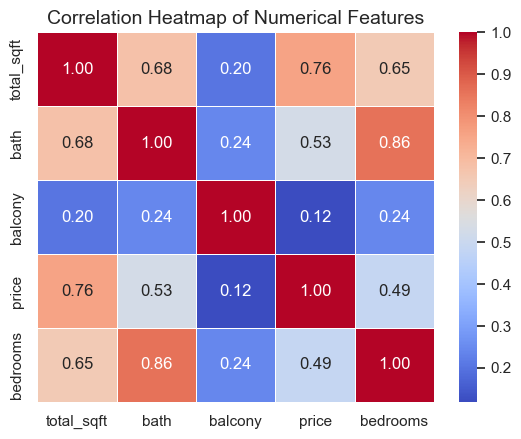

In [60]:
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

In [38]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
from sklearn.pipeline import make_pipeline

In [42]:
from sklearn.compose import make_column_transformer

In [43]:
col_trans = make_column_transformer((OneHotEncoder(sparse_output=False),['location']),remainder='passthrough')

In [44]:
lr = LinearRegression()

In [45]:
scaler = StandardScaler()

In [46]:
model = make_pipeline(col_trans,scaler,lr)

In [47]:
data_input = data3.drop(columns = ['price'])
data_output = data3['price']

In [48]:
x_train,x_test,y_train,y_test = train_test_split(data_input, data_output, test_size=0.2,random_state=42)

In [49]:
model.fit(x_train,y_train)

C:\Users\karth\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [50]:
model.score(x_test, y_test)

0.6742370898191788

In [51]:
input = pd.DataFrame([['Electronic City Phase II',2440.0,3.0,2.0,4]],columns = ['location','total_sqft','bath',	'balcony','bedrooms'])

In [52]:
model.predict(input)

array([172.31005437])

In [53]:
import pickle as pk

In [54]:
pk.dump(model,open('House_prediction_model.pkl','wb'))

In [55]:
data3.to_csv('Cleaned_data.csv')